#               Deep Learning pour la prédiction du cancer du sain

## Import les bibliothèques

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split , cross_val_score, validation_curve,learning_curve
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

## Import Data

In [4]:
Data.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432


In [2]:
Data = pd.read_csv("data.csv")
Data = Data.drop(columns=["id"])
Data 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.013400
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.020580
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,14.87,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.04951,0.1487,0.05748,0.2323,1.6360,1.596,21.84,0.005415,0.01371,0.02153,0.011830
496,0,12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,0.1641,0.06854,0.2324,0.6332,1.696,18.40,0.005704,0.02502,0.02636,0.010320
497,0,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,0.06046,0.1532,0.7810,1.253,11.91,0.003796,0.01371,0.01346,0.007096
498,1,18.49,17.52,121.30,1068.0,0.10120,0.13170,0.14910,0.09183,0.1832,0.06697,0.7923,1.0450,4.851,95.77,0.007974,0.03214,0.04435,0.015730


## Générer des statistiques descriptives.

In [6]:
Data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.390000,14.224206,19.086320,92.606620,662.844800,0.095978,0.103948,0.089941,0.049446,0.181370,0.062497,0.409736,1.200079,2.896527,41.128882,0.006933,0.025572,0.032153,0.011795
std,0.488238,3.476809,4.164842,23.983476,349.357241,0.013666,0.053096,0.080259,0.038875,0.027716,0.006866,0.282059,0.538277,2.054388,46.692555,0.002944,0.018453,0.031326,0.006209
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000
25%,0.000000,11.807500,16.070000,75.995000,430.550000,0.085992,0.063622,0.028885,0.020245,0.161875,0.057607,0.233725,0.826100,1.634250,18.035000,0.005152,0.012902,0.014640,0.007616
50%,0.000000,13.435000,18.680000,86.735000,556.150000,0.095825,0.091280,0.064315,0.033870,0.179550,0.061285,0.327600,1.077500,2.311000,24.970000,0.006254,0.020115,0.025875,0.010825
75%,1.000000,16.115000,21.562500,106.225000,800.775000,0.105100,0.130500,0.132150,0.074928,0.195625,0.065750,0.495375,1.465250,3.406750,46.742500,0.008030,0.032467,0.042530,0.014638
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790


## Renvoie un tuple représentant la dimensionnalité du DataFrame.

In [7]:
Data.shape

(500, 19)

## Les étiquettes de colonne du DataFrame.

In [8]:
Data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se'],
      dtype='object')

## Compter les valeurs NaN dans DataFrame

In [9]:
Data.isna().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave_points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
radius_se                 0
texture_se                0
perimeter_se              0
area_se                   0
smoothness_se             0
compactness_se            0
concavity_se              0
concave_points_se         0
dtype: int64

## Renvoie les float64 dans le DataFrame.

In [10]:
Columns = [column for column in Data.columns if Data[column].dtype == 'float64']
print(Columns)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se']


## affichage de histogram de diagnosis

0    305
1    195
Name: diagnosis, dtype: int64


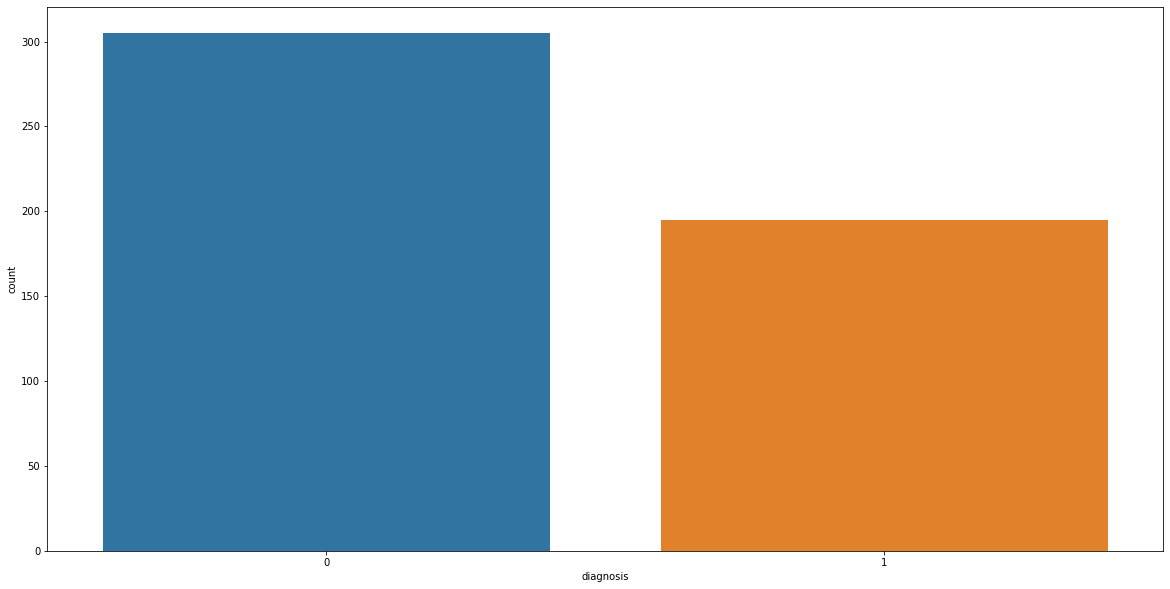

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(x=Data["diagnosis"])
print(Data["diagnosis"].value_counts())

## afficher un sous-ensemble de variables ou de tracer différentes variables sur les lignes et les colonnes.

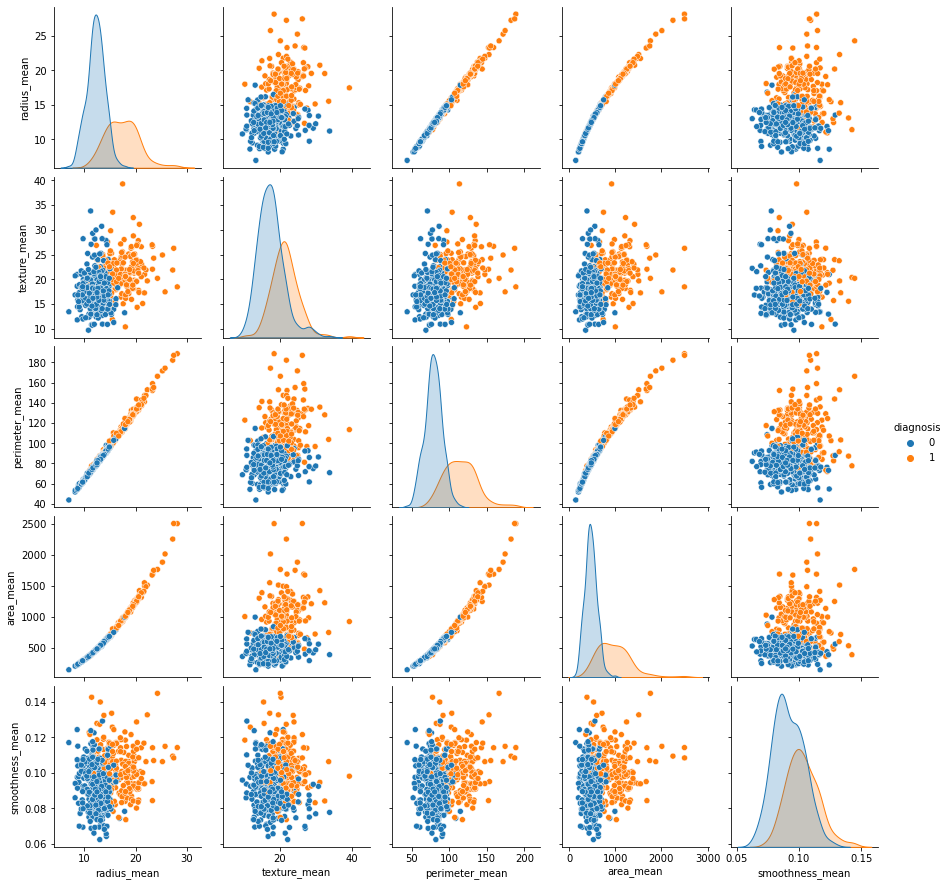

In [12]:
sns.pairplot(Data.iloc[:,:6],hue='diagnosis')

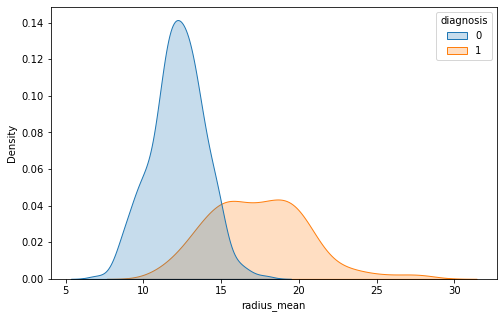

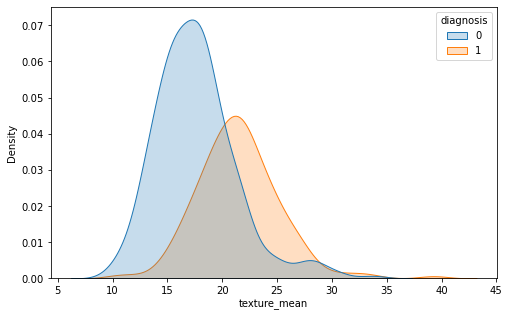

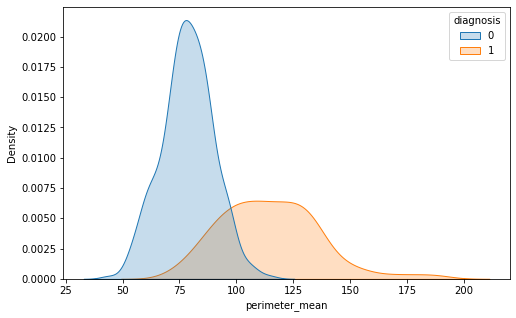

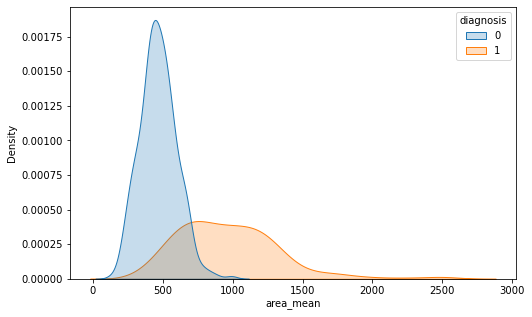

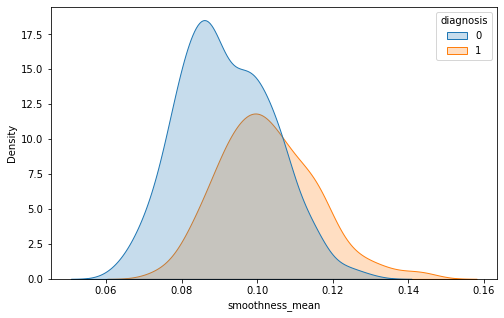

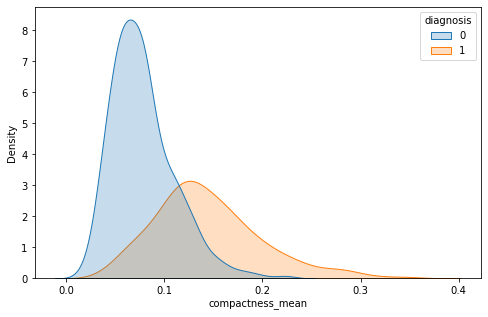

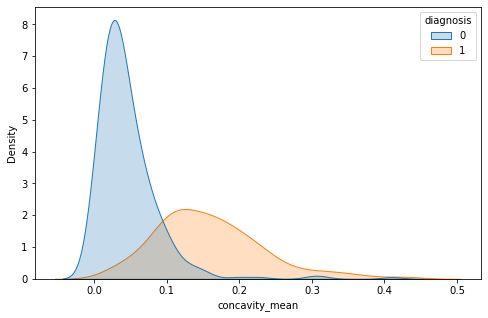

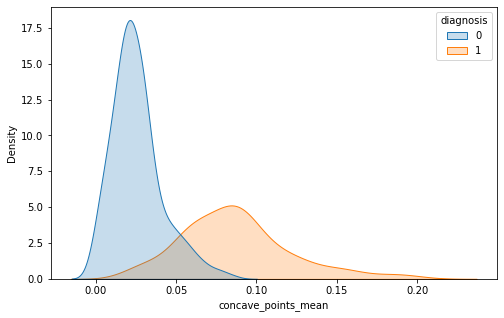

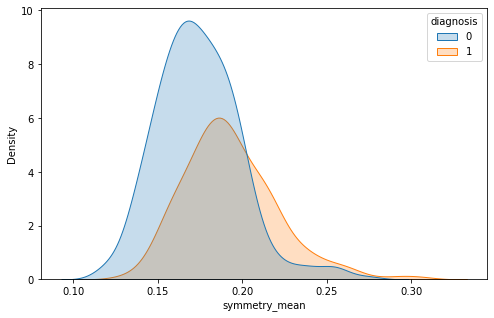

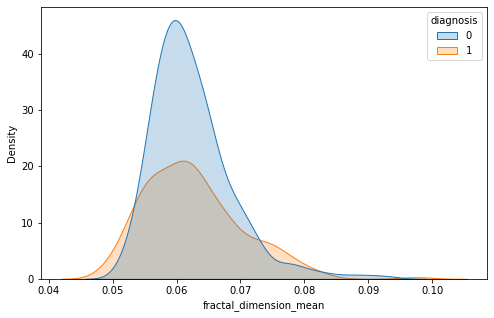

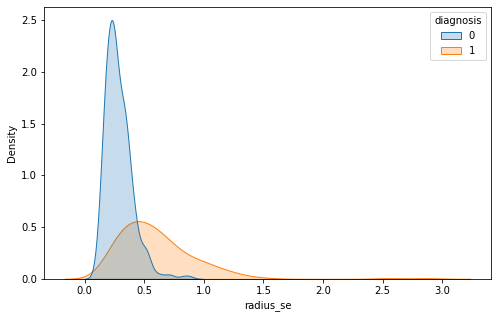

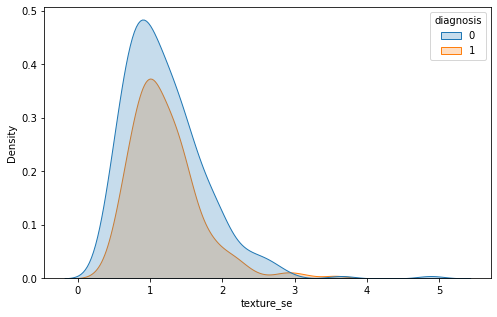

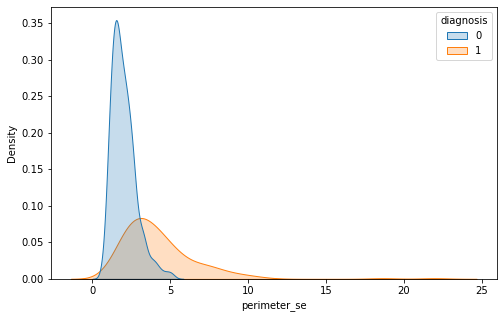

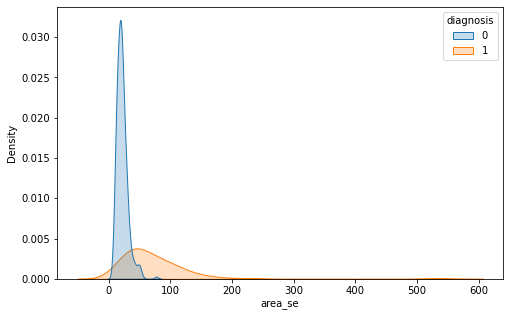

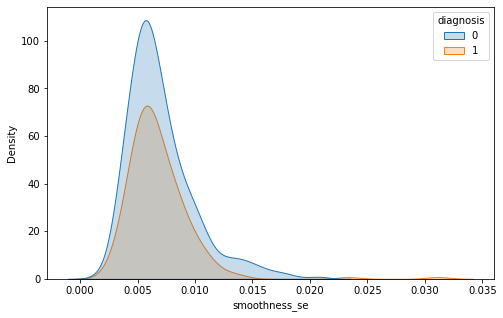

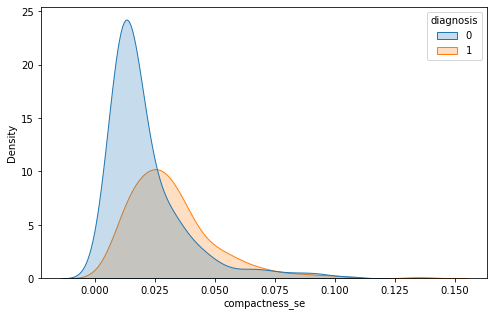

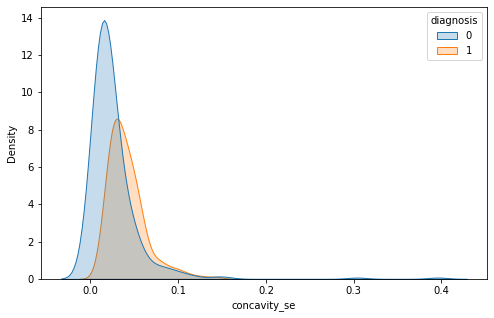

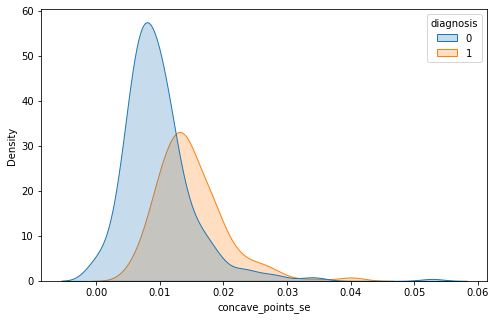

In [13]:
for column in Columns:
    plt.figure(figsize=(8,5))
    sns.kdeplot(data=Data, x=column, hue='diagnosis', fill=True)
    plt.show()

## Tracez des données rectangulaires sous forme de matrice codée en couleur.

<AxesSubplot:>

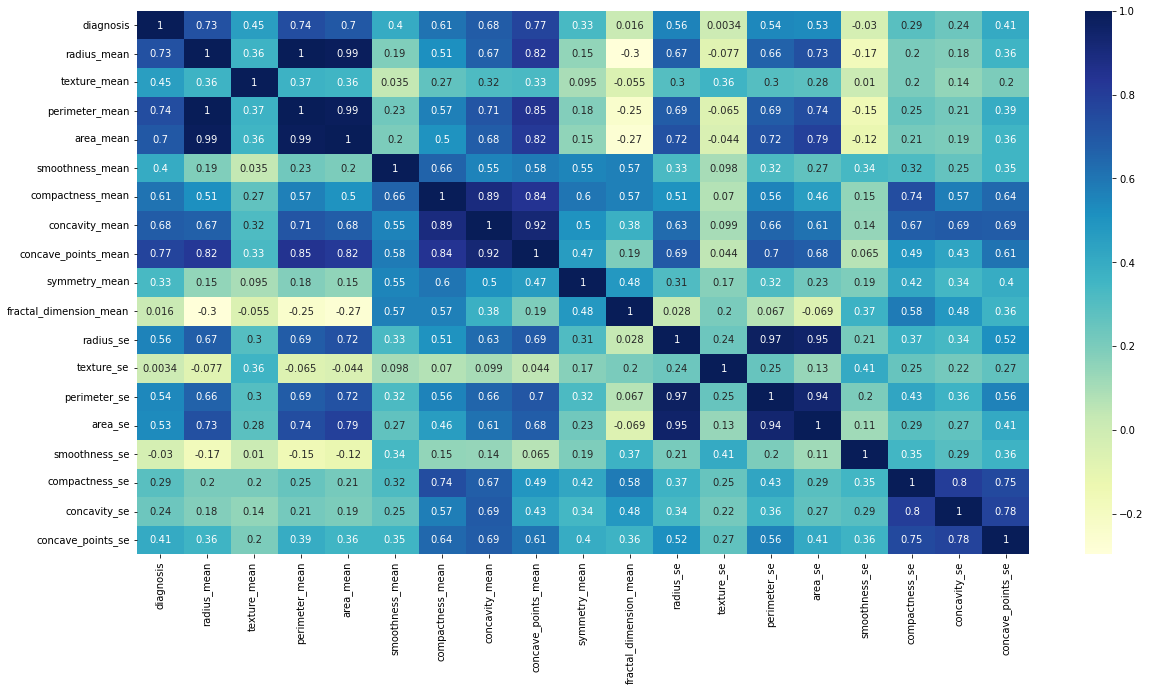

In [14]:
plt.figure(figsize=(20,10))
corr = Data.corr() #utilisé pour trouver la corrélation par paires de toutes les colonnes dans Data
sns.heatmap(corr, annot=True, cmap="YlGnBu")

## Prétraitement des données

In [15]:
y_train=Data["diagnosis"]
X_train=Data.drop(columns=["diagnosis"])
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

## obtenir uniquement un type de données object

In [16]:
Columns = X_train.select_dtypes(exclude='object').columns
print(Columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se'],
      dtype='object')


## Calculer les scores d'un estimateur avec différentes valeurs d'un paramètre spécifié

In [17]:
model = RandomForestClassifier()
k = np.arange(1,50)
train_score, val_score = validation_curve(model, X_train, y_train,
                                          param_name= 'n_estimators',param_range= k, cv=3)
print("********les valeur de score***********\n",val_score)
print("\n********les valeur de train:**********\n",train_score)

********les valeur de score***********
 [[0.8358209  0.90225564 0.88721805]
 [0.85820896 0.93233083 0.84210526]
 [0.8880597  0.91729323 0.89473684]
 [0.91044776 0.93233083 0.89473684]
 [0.90298507 0.92481203 0.84962406]
 [0.91791045 0.93984962 0.87969925]
 [0.8880597  0.93984962 0.88721805]
 [0.93283582 0.93233083 0.93233083]
 [0.91791045 0.92481203 0.87969925]
 [0.94029851 0.93984962 0.87969925]
 [0.90298507 0.93984962 0.89473684]
 [0.90298507 0.95488722 0.90225564]
 [0.91791045 0.92481203 0.87969925]
 [0.91044776 0.93984962 0.92481203]
 [0.91044776 0.93233083 0.89473684]
 [0.91044776 0.93984962 0.89473684]
 [0.91791045 0.93233083 0.90225564]
 [0.91791045 0.92481203 0.90225564]
 [0.90298507 0.93984962 0.89473684]
 [0.8880597  0.94736842 0.87969925]
 [0.89552239 0.93233083 0.90225564]
 [0.91044776 0.92481203 0.89473684]
 [0.93283582 0.93984962 0.89473684]
 [0.91044776 0.94736842 0.90225564]
 [0.91791045 0.94736842 0.90225564]
 [0.91791045 0.91729323 0.90225564]
 [0.91044776 0.93233083 

## Calculer la moyenne des scores d'un estimateur 

In [18]:

print("********les valeur de score moyenne***********\n",val_score.mean(axis=1))
print("\n********les valeur de train moyenne:**********\n",train_score.mean(axis=1))

********les valeur de score moyenne***********
 [0.87509819 0.87754835 0.90002993 0.91250514 0.89247372 0.91248644
 0.90504246 0.93249916 0.90747391 0.91994913 0.91252385 0.92004264
 0.90747391 0.92503647 0.91250514 0.91501141 0.91749897 0.91499271
 0.91252385 0.90504246 0.91003628 0.90999888 0.9224741  0.92002394
 0.9225115  0.91248644 0.91501141 0.90753002 0.91254255 0.91755508
 0.92002394 0.91005499 0.91751767 0.9224741  0.91503011 0.90999888
 0.91252385 0.91751767 0.92002394 0.91753638 0.91755508 0.92002394
 0.90753002 0.91254255 0.90753002 0.91501141 0.91753638 0.91254255
 0.91503011]

********les valeur de train moyenne:**********
 [0.95875456 0.95874048 0.98250307 0.97748585 0.99000779 0.99500155
 0.9937578  0.9937578  0.99624999 0.99126092 0.99500624 0.99749843
 0.99875156 0.99875156 0.99624999 1.         1.         0.99875156
 0.99875156 0.99875156 1.         0.99875156 0.99749843 0.99750312
 1.         0.99875156 0.99875156 1.         1.         0.99874687
 1.         0.99875

## le score en fonction de nombre n_estimators

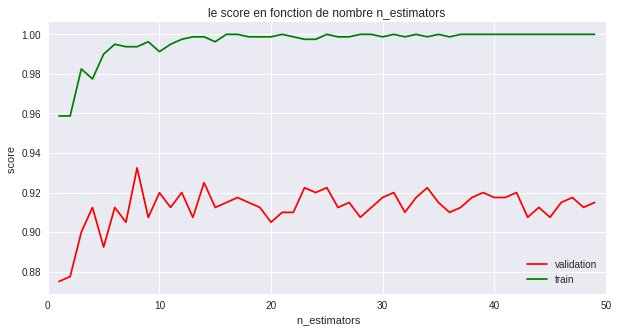

In [19]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10,5))
ax.set(title="le score en fonction de nombre n_estimators",
       ylabel="score ",
       xlabel=" n_estimators")
ax.set_xlim(0, 50)

ax.plot(k, val_score.mean(axis=1), 'red', label='validation')
ax.plot(k, train_score.mean(axis=1), 'green', label='train')
ax.legend()

[ 32  64  96 128 160 192 224 256 288 320]


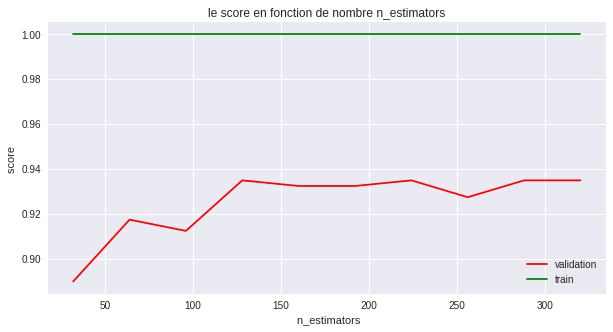

In [20]:
N,train_score,val_score = learning_curve(RandomForestClassifier(),X_train,y_train,
                                         train_sizes = np.linspace(0.1,1.0,10),cv=5)
print(N)
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10,5))
ax.set(title="le score en fonction de nombre n_estimators",
       ylabel="score ",
       xlabel=" n_estimators")

ax.plot(N, val_score.mean(axis=1), 'red', label='validation')
ax.plot(N, train_score.mean(axis=1), 'green', label='train')
ax.legend()


## Méthodes génériques pour la préparation du modèle

In [21]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))


1.0
0.97


## Résumé de l'analyse

In [22]:
from prettytable import PrettyTable

x = PrettyTable(["Model", "Train Accuracy", "AUC SCORE"])
z=str(int(model.score(X_train,y_train))*100)+"%"
v=str(int(model.score(X_test,y_test)*100))+"%"
x.add_row(["RandomForestClassifier",z,v])
print(x)

+------------------------+----------------+-----------+
|         Model          | Train Accuracy | AUC SCORE |
+------------------------+----------------+-----------+
| RandomForestClassifier |      100%      |    97%    |
+------------------------+----------------+-----------+


## Fonction de test 

In [35]:
def test(model,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se):
    x = np.array([radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se]).reshape(1,18)
    r = model.predict(x)
    m = model.predict_proba(x)
    if r==0:
        print("vous ete bénigne avec un pouesentage de : ",m[0,0]*100,"%")
        print(m)
    else:
        print("vous avez un cancer maligne avec un pouesentage de : ",m[0,1]*100,"%")
        print(m)
   
    
    

In [36]:
test(model,9.333,21.94,59.01,264.0,0.0924,0.05605,0.03996,0.01282,0.1692,0.06576,0.3013,1.879,2.121,17.86,0.01094,0.01834,0.03996,0.01282)

vous ete bénigne avec un pouesentage de :  98.0 %
[[0.98 0.02]]


In [37]:
test(model,20.6,29.33,140.1,1265.0,0.1178,0.277,0.3514,0.152,0.2397,0.07016,0.726,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664)


vous avez un cancer maligne avec un pouesentage de :  100.0 %
[[0. 1.]]


In [4]:
from sklearn.metric import roc_curve,roc_auc_score
fpr,tpr,threshold = roc_curve(x_test,y_test)
auc=roc_auc_score(x_test,y_test)
plt.plot(fpr,tpr)
plt.show()

ModuleNotFoundError: No module named 'sklearn.metric'